In [140]:
# Regresion lineal con multiples variables

import numpy as np 
import matplotlib.pyplot as plt

def calcularCosto(X, y, theta):
    J = 0
    s = np.power((X.dot(theta) - np.transpose([y])), 2)
    #print("INICIO DENTRO COSTO")
    #print(s)
    #print(s.sum(axis = 0))
    #print("FIN DENTRO COSTO")
    J = (1.0 / (2 * m)) * s.sum(axis = 0)

    return J

def descensoGradienteMulti(X, y, theta, alpha, num_iteraciones):
    m = len(y) # numero de ejemplos de entrenamiento
    J_history = np.zeros((num_iteraciones, 1))

    for i in range(num_iteraciones):
        theta = theta - alpha * (1.0 / m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))
        # Guardar el costo de J en cada iteracion 
        J_history[i] = calcularCosto(X, y, theta)
        # print(J_history[i])

    return theta, J_history

def normalizarCaracteristicas(X):
    # Se requiere establecer los valores de manera correcta
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))

    for i in range(X.shape[1]):
    	mu[:, i] = np.mean(X[:, i])
    	sigma[:, i] = np.std(X[:, i])
    	X_norm[:, i] = (X[:, i] - float(mu[:, i])) / float(sigma[:, i])

    return X_norm, mu, sigma


In [141]:
print('Cargando datos ...\n')
data = np.loadtxt('dsPolCuad.txt', delimiter=",")
print(data)

Cargando datos ...

[[ 15.   5.]
 [ 16.   6.]
 [ 20.  20.]
 [ 21.  30.]
 [ 25.  40.]
 [ 28.  45.]
 [ 30.  50.]
 [ 33.  60.]
 [ 35.  80.]
 [ 38.  98.]
 [ 40. 102.]
 [ 45. 100.]
 [ 49. 101.]
 [ 54.  95.]
 [ 57.  90.]
 [ 63.  86.]
 [ 65.  80.]
 [ 68.  65.]
 [ 70.  50.]
 [ 75.  35.]
 [ 78.  30.]
 [ 80.  26.]
 [ 83.  20.]
 [ 85.  15.]
 [ 88.   5.]]


(25, 1)
(25, 1)
(25, 2)
Primeros 10 ejemplos del dataset: 

x = [15 225], y = 5
x = [16 256], y = 6
x = [20 400], y = 20
x = [21 441], y = 30
x = [25 625], y = 40
x = [28 784], y = 45
x = [30 900], y = 50
x = [33 1089], y = 60
x = [35 1225], y = 80
x = [38 1444], y = 98


Text(0, 0.5, 'X2')

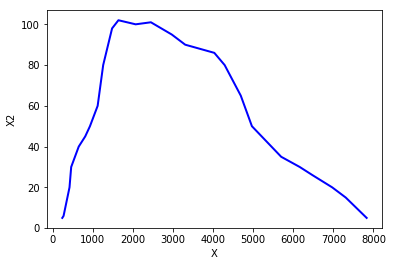

In [142]:
X = data[:, :1]
y = data[:, 1]
print(X.shape)
#print(X)
newColumn = np.power(X[:, 0], 2)[...,None]
print(newColumn.shape)
X_x2agregado = np.append(X, newColumn, 1)
print(X_x2agregado.shape)
#print(X_x2agregado)

#print(y)
# Imprime algunos puntos de los datos
print('Primeros 10 ejemplos del dataset: \n')
for i in range(10):
    print ("x = [{:.0f} {:.0f}], y = {:.0f}".format(X_x2agregado[i,0], X_x2agregado[i,1], y[i]))

plt.plot(X_x2agregado[:,0] + X_x2agregado[:, 1], y, "-b", linewidth = 2)
plt.xlabel('X')
plt.ylabel('X2')

[[-1.51612785 -1.17781004]
 [-1.47334772 -1.16506851]
 [-1.30222719 -1.10588208]
 [-1.25944706 -1.08903039]
 [-1.08832654 -1.01340328]
 [-0.95998614 -0.94805159]
 [-0.87442588 -0.90037363]
 [-0.74608549 -0.82269143]
 [-0.66052522 -0.76679313]
 [-0.53218483 -0.67678043]
 [-0.44662457 -0.6126618 ]
 [-0.23272391 -0.43797961]
 [-0.06160339 -0.28343726]
 [ 0.15229727 -0.07176355]
 [ 0.28063766  0.06510508]
 [ 0.53731845  0.36103725]
 [ 0.62287871  0.46625757]
 [ 0.7512191   0.63025332]
 [ 0.83677936  0.74369398]
 [ 1.05068002  1.04168124]
 [ 1.17902041  1.230338  ]
 [ 1.26458068  1.36021934]
 [ 1.39292107  1.5612066 ]
 [ 1.47848133  1.69930828]
 [ 1.60682172  1.91262606]]
[[  50.44 3090.6 ]]
[[  23.37533743 2432.98996299]]


Text(0, 0.5, 'X2')

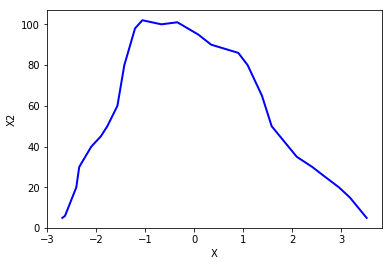

In [143]:
X_norm, mu, sigma = normalizarCaracteristicas(X_x2agregado)
print(X_norm)
print(mu)
print(sigma)
plt.plot(X_norm[:,0] + X_norm[:, 1], y, "-b", linewidth = 2)
plt.xlabel('X')
plt.ylabel('X2')

In [144]:
# Añadir término de intercepción x0 a X
m = len(y)
X_x0agregado = np.column_stack((np.ones((m, 1)), X_norm)) # Añadir una columna de unos a x
print(X_x0agregado)

[[ 1.         -1.51612785 -1.17781004]
 [ 1.         -1.47334772 -1.16506851]
 [ 1.         -1.30222719 -1.10588208]
 [ 1.         -1.25944706 -1.08903039]
 [ 1.         -1.08832654 -1.01340328]
 [ 1.         -0.95998614 -0.94805159]
 [ 1.         -0.87442588 -0.90037363]
 [ 1.         -0.74608549 -0.82269143]
 [ 1.         -0.66052522 -0.76679313]
 [ 1.         -0.53218483 -0.67678043]
 [ 1.         -0.44662457 -0.6126618 ]
 [ 1.         -0.23272391 -0.43797961]
 [ 1.         -0.06160339 -0.28343726]
 [ 1.          0.15229727 -0.07176355]
 [ 1.          0.28063766  0.06510508]
 [ 1.          0.53731845  0.36103725]
 [ 1.          0.62287871  0.46625757]
 [ 1.          0.7512191   0.63025332]
 [ 1.          0.83677936  0.74369398]
 [ 1.          1.05068002  1.04168124]
 [ 1.          1.17902041  1.230338  ]
 [ 1.          1.26458068  1.36021934]
 [ 1.          1.39292107  1.5612066 ]
 [ 1.          1.47848133  1.69930828]
 [ 1.          1.60682172  1.91262606]]


In [145]:
# ================ Descenso por el gradiente ================
print('Ejecutando descenso por el gradiente ...')
# Se establece un valor para alpha
alpha = 0.001
num_iteraciones = 16000

# inicializa theta y ejecuta descenso por el gradiente
theta = np.zeros((3, 1)) 
print(theta)
theta, J_history = descensoGradienteMulti(X_x0agregado, y, theta, alpha, num_iteraciones)
print(theta)

Ejecutando descenso por el gradiente ...
[[0.]
 [0.]
 [0.]]
[[  53.36      ]
 [ 160.84814441]
 [-165.55097047]]


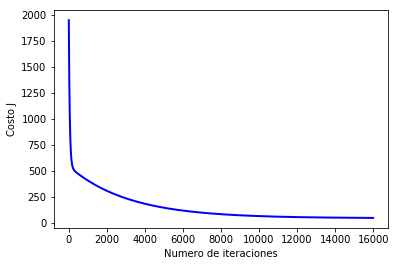

In [146]:
plt.plot(range(J_history.size), J_history, "-b", linewidth = 2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
plt.show(block = False)


In [147]:
# Mostrar los resultados del descenso por el gradiente
print('Theta calculado a partir del descenso por el gradiente: ')
print("{:f}, {:f}, {:f}".format(theta[0, 0], theta[1, 0], theta[2, 0]))
print("")

# Estimar el la capacidad rendimiento para una persona de una determinada edad
# Recuerda que la primera columna de X es de unos, por este motivo no es 
# necesario normalizar esta columna

edad_norm = (38 - float(mu[:, 0])) / float(sigma[:, 0])
print(edad_norm)
edad2_norm = (1444 - float(mu[:, 1])) / float(sigma[:, 1])
print(edad2_norm)
rend_norm_padded = np.array([1, edad_norm, edad2_norm])
print(rend_norm_padded)
print(rend_norm_padded.dot(theta))

Theta calculado a partir del descenso por el gradiente: 
53.360000, 160.848144, -165.550970

-0.5321848309942042
-0.6767804327387478
[ 1.         -0.53218483 -0.67678043]
[79.80071488]
